In [115]:
from PIL import Image
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [146]:
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.preprocessing import OneHotEncoder

In [120]:
#membaca data train dari dataset yang ada lalu diambil data tersebut dari secara kuartilnya
#menyeimbangkan data
df = pd.read_csv('el4233-2018-2019-02-ann-klasifikasi-train.csv', header = None, index_col=0)
df[1] = pd.qcut(df[1], 250, labels = False)
df[2] = pd.qcut(df[2], 50, labels = False)

encoder = OneHotEncoder()

In [121]:
df.head()

,1,2,3
0,,,
0,44,9,0
1,4,6,1
2,117,17,0
3,182,23,1
4,106,46,1


Text(0, 0.5, 'y')

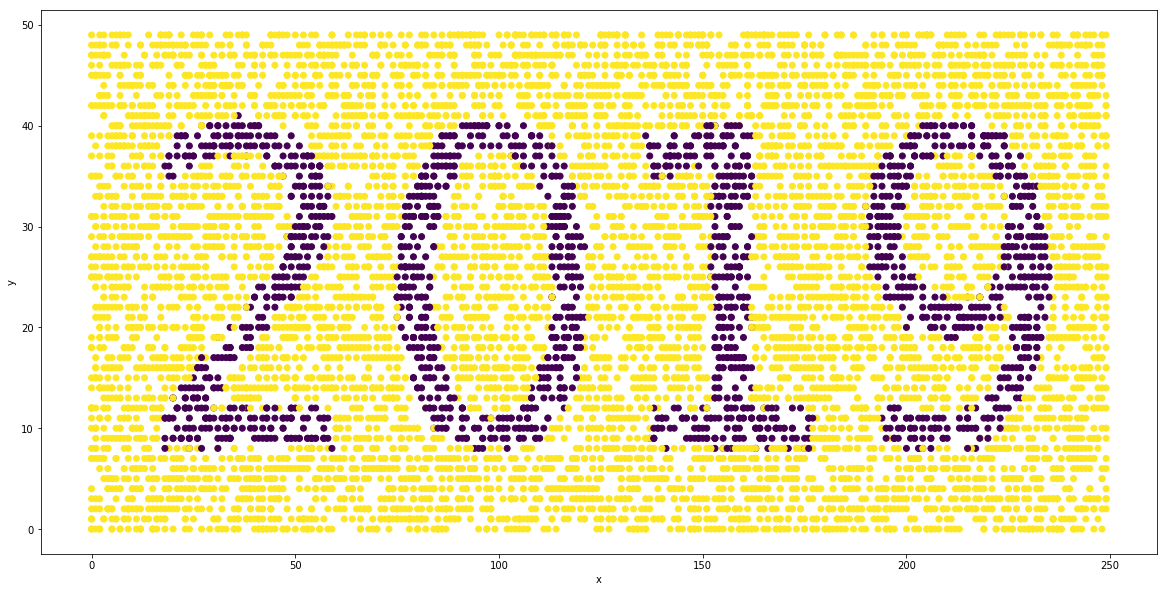

In [123]:
#melakukan plotting data
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10)) 
plt.scatter(df[1],df[2],c=df[3])
plt.xlabel("x")
plt.ylabel("y")

In [124]:
#import library yang akan digunakan untuk pemodelan
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [144]:
#melakukan pembuatan model dengan mengatur hyperaparameter yang ada dan berpengaruh terhadap model
#hyperparameter yang dipilih akan menentukan overfitting maupun underfitting dari model yang akan diaplikasikan ke dalam data
clf=MLPClassifier(hidden_layer_sizes=(500,200,100,),batch_size=32,max_iter=100,verbose=True,early_stopping=False,validation_fraction=0.25)

In [145]:
#melakukan fitting dari model dengan menggunakan dataset yang akan dimodelkan
clf.fit(encoder.fit_transform(df.drop(3,axis=1)),df[3])

c:\users\asus\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


Iteration 1, loss = 0.30020564
Iteration 2, loss = 0.16353362
Iteration 3, loss = 0.08812446
Iteration 4, loss = 0.05478520
Iteration 5, loss = 0.04201831
Iteration 6, loss = 0.03530493
Iteration 7, loss = 0.02897755
Iteration 8, loss = 0.02689204
Iteration 9, loss = 0.02324141
Iteration 10, loss = 0.02106325
Iteration 11, loss = 0.01856026
Iteration 12, loss = 0.01632046
Iteration 13, loss = 0.01605514
Iteration 14, loss = 0.01576808
Iteration 15, loss = 0.01435074
Iteration 16, loss = 0.01437887
Iteration 17, loss = 0.01418086
Iteration 18, loss = 0.01420478
Iteration 19, loss = 0.01889440
Iteration 20, loss = 0.02214444
Iteration 21, loss = 0.01976867
Iteration 22, loss = 0.01509825
Iteration 23, loss = 0.01453825
Iteration 24, loss = 0.01551041
Iteration 25, loss = 0.01458088
Iteration 26, loss = 0.01431607
Iteration 27, loss = 0.01372027
Iteration 28, loss = 0.01383503
Iteration 29, loss = 0.01358735
Iteration 30, loss = 0.01348158
Iteration 31, loss = 0.01334612
Iteration 32, los

MLPClassifier(activation='relu', alpha=0.0001, batch_size=32, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(500, 200, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.25, verbose=True, warm_start=False)

In [147]:
#membaca dataset yang akan ditest menggunakan model dan menyeimbangkannya
df_test = pd.read_csv('el4233-2018-2019-02-ann-klasifikasi-test.csv', header = None, index_col=0)
df_test[1] = pd.qcut(df_test[1], 250, labels = False)
df_test[2] = pd.qcut(df_test[2], 50, labels = False)

In [148]:
#melakukan fitting data test dengan model yang ada
ypredict=clf.predict(encoder.transform(df_test))

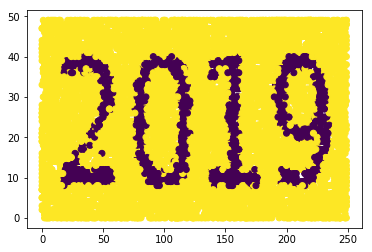

In [150]:
#plotting hasil dari pemodelan
plt.scatter(df_test[1],df_test[2],c=ypredict)

In [151]:
#mengeksport hasil prediksi dari model ke dalam file csv
df_test[3] = pd.Series(prediction)
print(df_test)
df_test = df_test.iloc[:, 0:3]
df_test.to_csv('el4233-hasil-mlp.csv', header=None)

        1   2  3
0               
0       5  35  1
1     227  15  0
2      88   8  1
3     217  16  1
4      24  49  1
5     215  15  1
6      93   9  0
7     172  46  1
8     248   8  1
9     100   4  1
10     71  10  1
11    130   7  1
12     69   5  1
13    223  42  1
14     80  43  1
15     58  33  0
16     81  31  0
17     51  20  1
18    133   6  1
19    201  32  1
20     89  33  1
21    129   3  1
22    190   2  1
23    136  28  1
24    168  15  1
25     10  21  1
26     21  16  1
27    130  15  1
28    187  45  1
29    207  16  1
...   ...  .. ..
9970   44  35  1
9971    3  40  1
9972   83  43  1
9973  161  17  0
9974  123  46  1
9975  160  46  1
9976   32  19  1
9977   28  33  1
9978  140  14  1
9979   15  11  1
9980  229   6  1
9981  168  23  1
9982  181   0  1
9983   18  15  1
9984   78  10  1
9985  159   1  1
9986  132  33  1
9987  206  11  0
9988  237   5  1
9989   73  13  1
9990   94  46  1
9991  202  40  0
9992   37   4  1
9993   79  33  0
9994  144  39  0
9995  103  28 